# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

C:\Users\Harsh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [73]:
import plotly.graph_objects as go

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [8]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [14]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [27]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [47]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [38]:
index_na = df_fatalities.loc[pd.isna(df_fatalities["armed"]), :].index

Index([615, 1551, 1715, 1732, 1825, 1975, 2145, 2469, 2487], dtype='int64')

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [45]:
df_pct_poverty = df_pct_poverty.sort_values(by='poverty_rate',ascending=False)
df_pct_poverty

,Geographic Area,City,poverty_rate
4472,FL,Homestead Base CDP,98.6
23716,SD,Allen CDP,94.1
27738,WA,Outlook CDP,93.8
20428,OK,Badger Lee CDP,93.8
26509,UT,Randlett CDP,93.5
...,...,...,...
2141,CA,Caribou CDP,-
25674,TX,Olivia Lopez de Gutierrez CDP,-
676,AK,Eureka Roadhouse CDP,-
3076,CA,Robinson Mill CDP,-


C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\1388597881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\1388597881.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
 

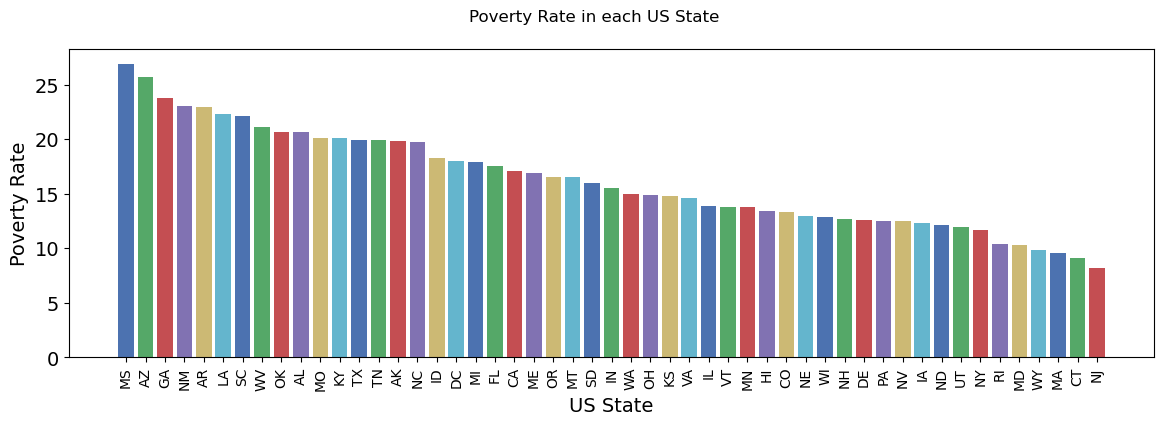

In [52]:
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
plt.style.use('seaborn-deep')

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty.index[n], poverty[n])

plt.show()

In [55]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [56]:
df_pct_completed_hs = df_pct_completed_hs.sort_values(by='percent_completed_hs')
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\4262559769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\2788341196.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(graduation_rate.index[n], graduation_rate[n])


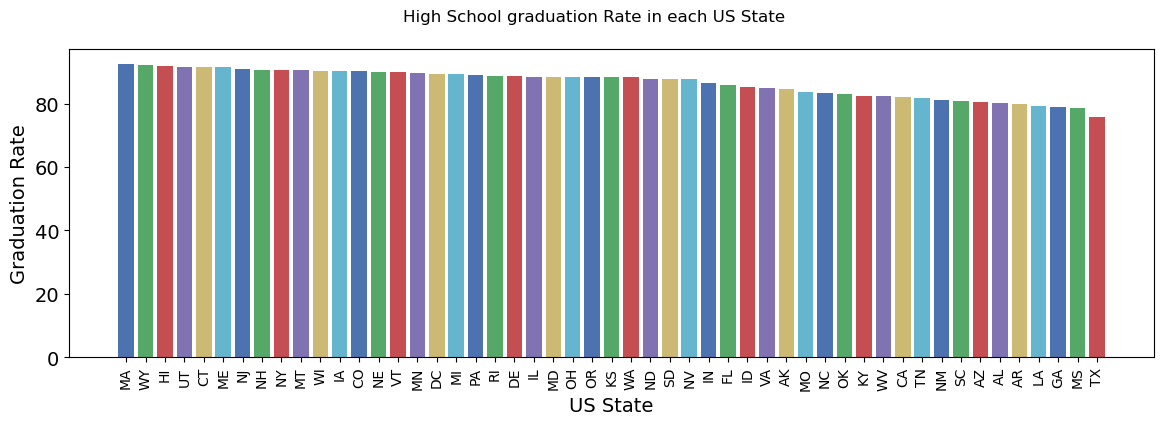

In [60]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)
graduation_rate = df_pct_completed_hs.groupby(by='Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

,Geographic Area,City,percent_completed_hs
14024,MO,Goss town,-
770,AK,Loring CDP,-
14570,MO,Tarrants village,-
1113,AZ,Hunter Creek CDP,-
16280,NJ,Ross Corner CDP,-
...,...,...,...
7176,IL,Scott AFB CDP,99.8
26212,TX,West Lake Hills city,99.8
23070,PA,Toftrees CDP,99.8
25983,TX,Serenada CDP,99.9


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

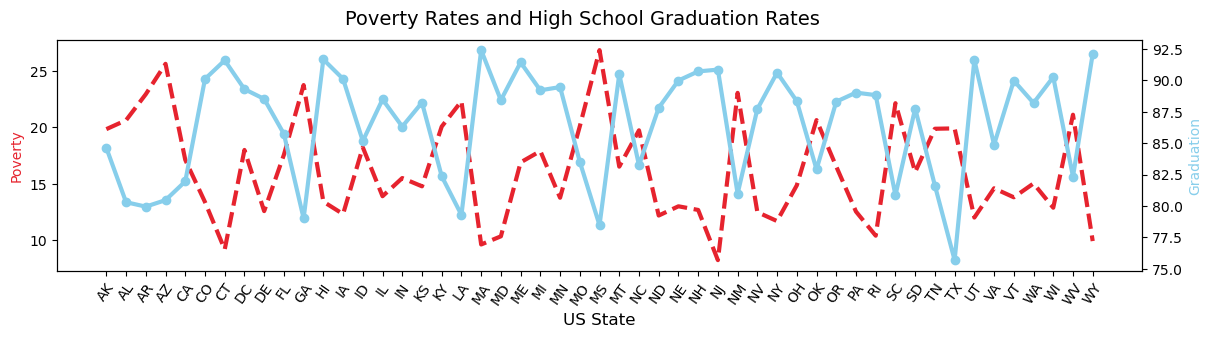

In [62]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Graduation', color='skyblue') # or a named colour
 
ax1.plot(poverty_vs.index, poverty_vs, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='skyblue', linewidth=3, marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [64]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)
poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)
hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

merged = pd.merge(hs, poverty, on=['Geographic Area'], how='inner')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

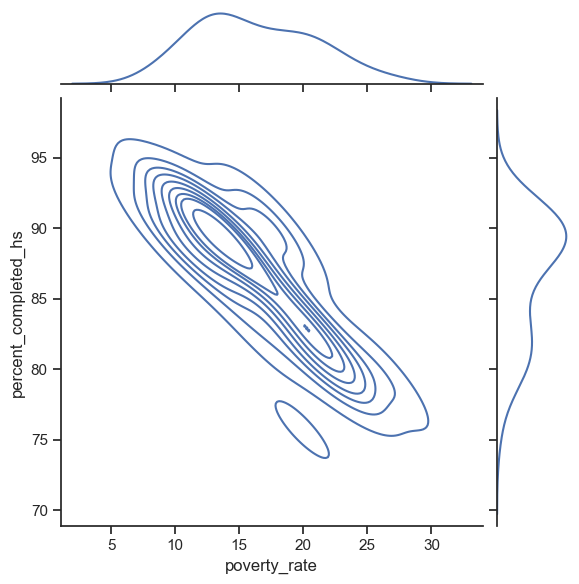

In [65]:
sns.set_theme(style="ticks")

sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


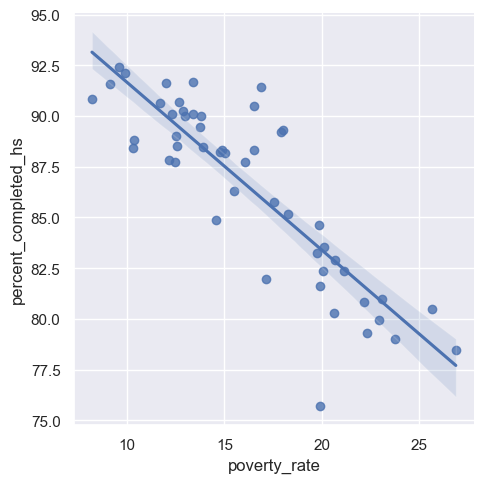

In [66]:
sns.set_theme(color_codes=True)

sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

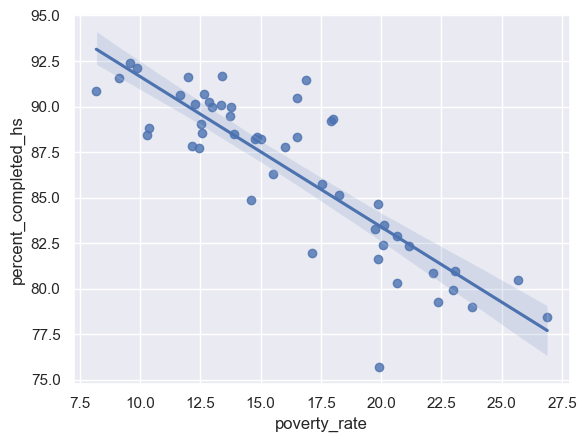

In [67]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [70]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian',
                    'share_hispanic']] =df_share_race_city[['share_white', 'share_black', 
'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

In [71]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


In [79]:
traces = []
for indexs in racial.columns:
    trace = go.Bar(
        x=racial.index,
        y=racial[indexs],
        name=indexs
    )
    traces.append(trace)

# Layout
layout = go.Layout(
    title="Demographic by State",
    xaxis=dict(title="State"),
    yaxis=dict(title="Demographic"),
    barmode='stack',
    width=1000
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [82]:
killed = df_fatalities.race.value_counts()
killed
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

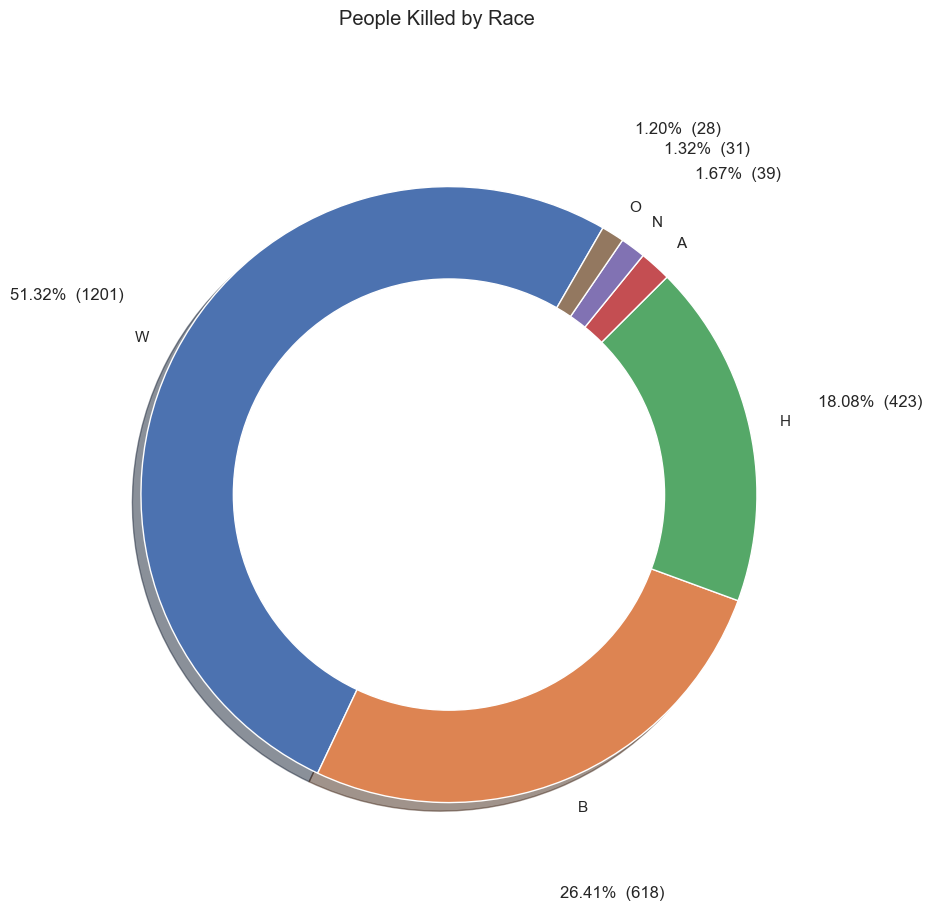

In [83]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.figure(figsize=(10,10))
plt.suptitle('People Killed by Race')
plt.pie(killed, labels=killed.index, autopct=make_autopct(killed), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
# plt.legend(loc='best')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [88]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender.unique()

array([2428,  107], dtype=int64)

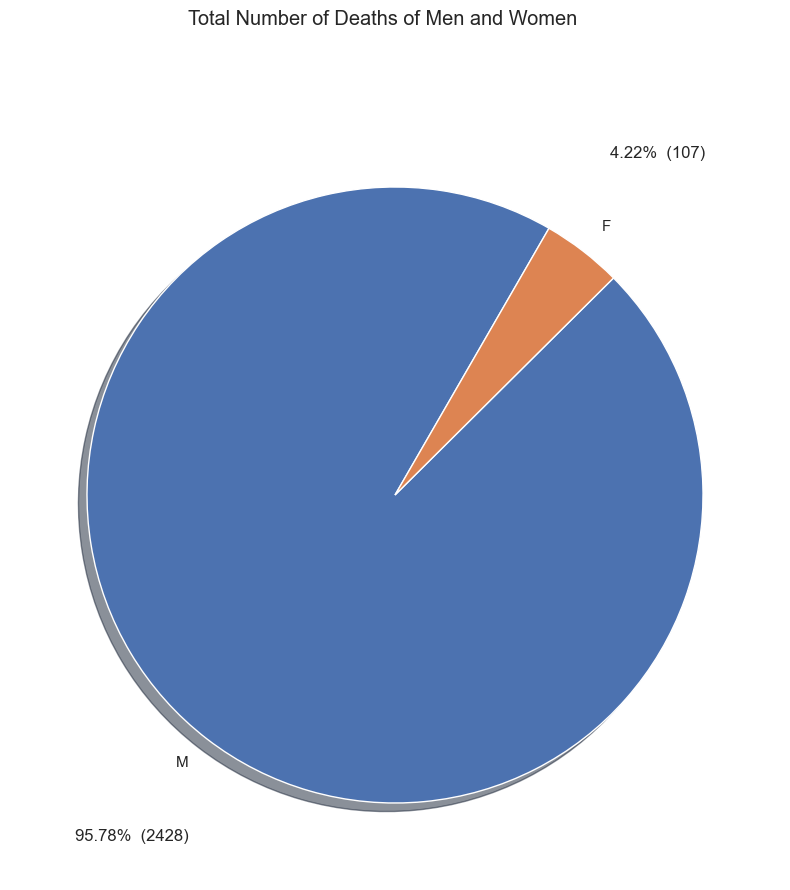

In [89]:
plt.figure(figsize=(10,10))
plt.suptitle('Total Number of Deaths of Men and Women')
plt.pie(killed_gender, labels=killed_gender.index, autopct=make_autopct(killed_gender), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
# plt.legend(loc='best')

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [90]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


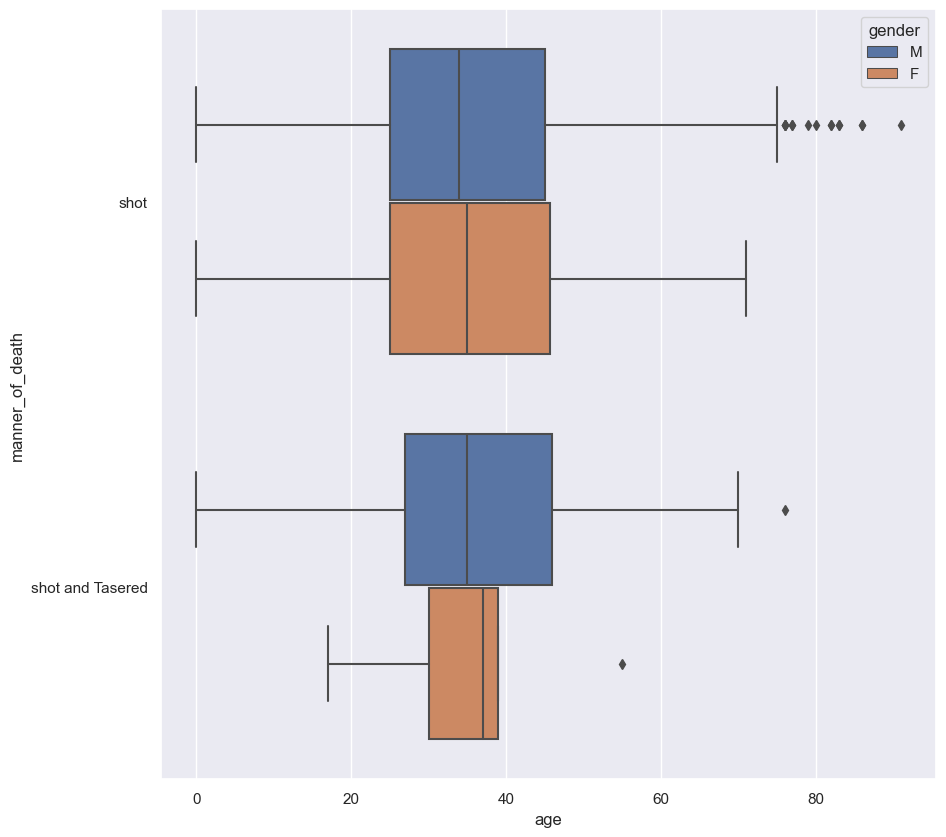

In [91]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [93]:
armed = df_fatalities.copy()

weapons = ['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']

armed.armed = armed.armed.replace(weapons, 'armed')

armed.armed.unique()

array(['armed', 'unarmed', nan], dtype=object)

In [94]:
percentage = armed.armed.value_counts()
percentage

armed
armed      2355
unarmed     171
Name: count, dtype: int64

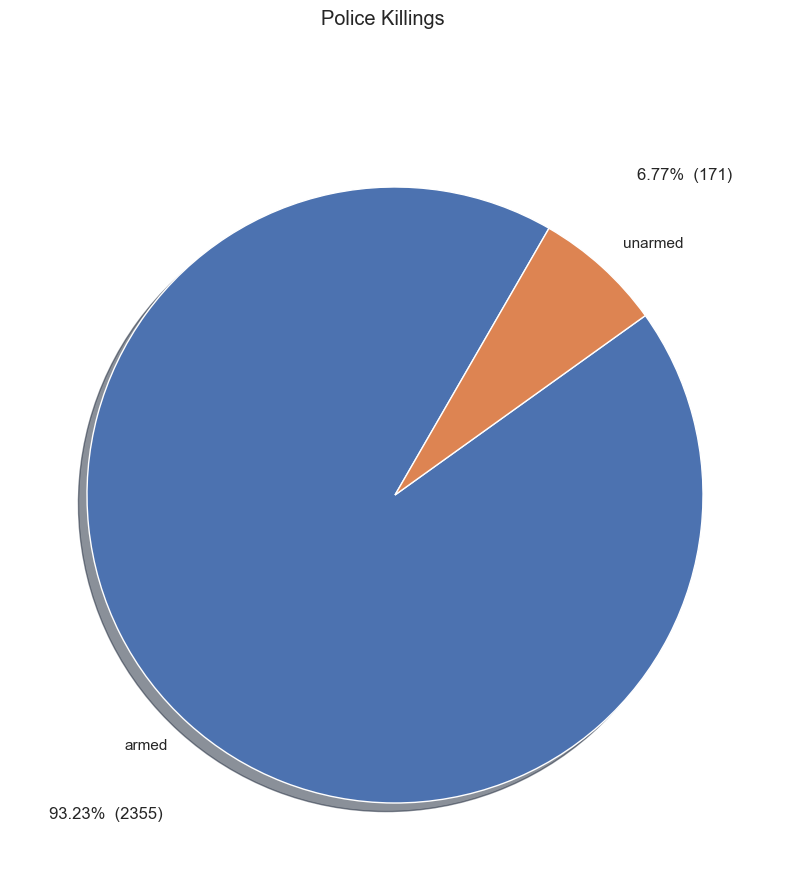

In [95]:
plt.figure(figsize=(10,10))
plt.suptitle('Police Killings')
plt.pie(percentage, labels=percentage.index, autopct=make_autopct(percentage), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
# plt.legend(loc='best')

plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\2622875666.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



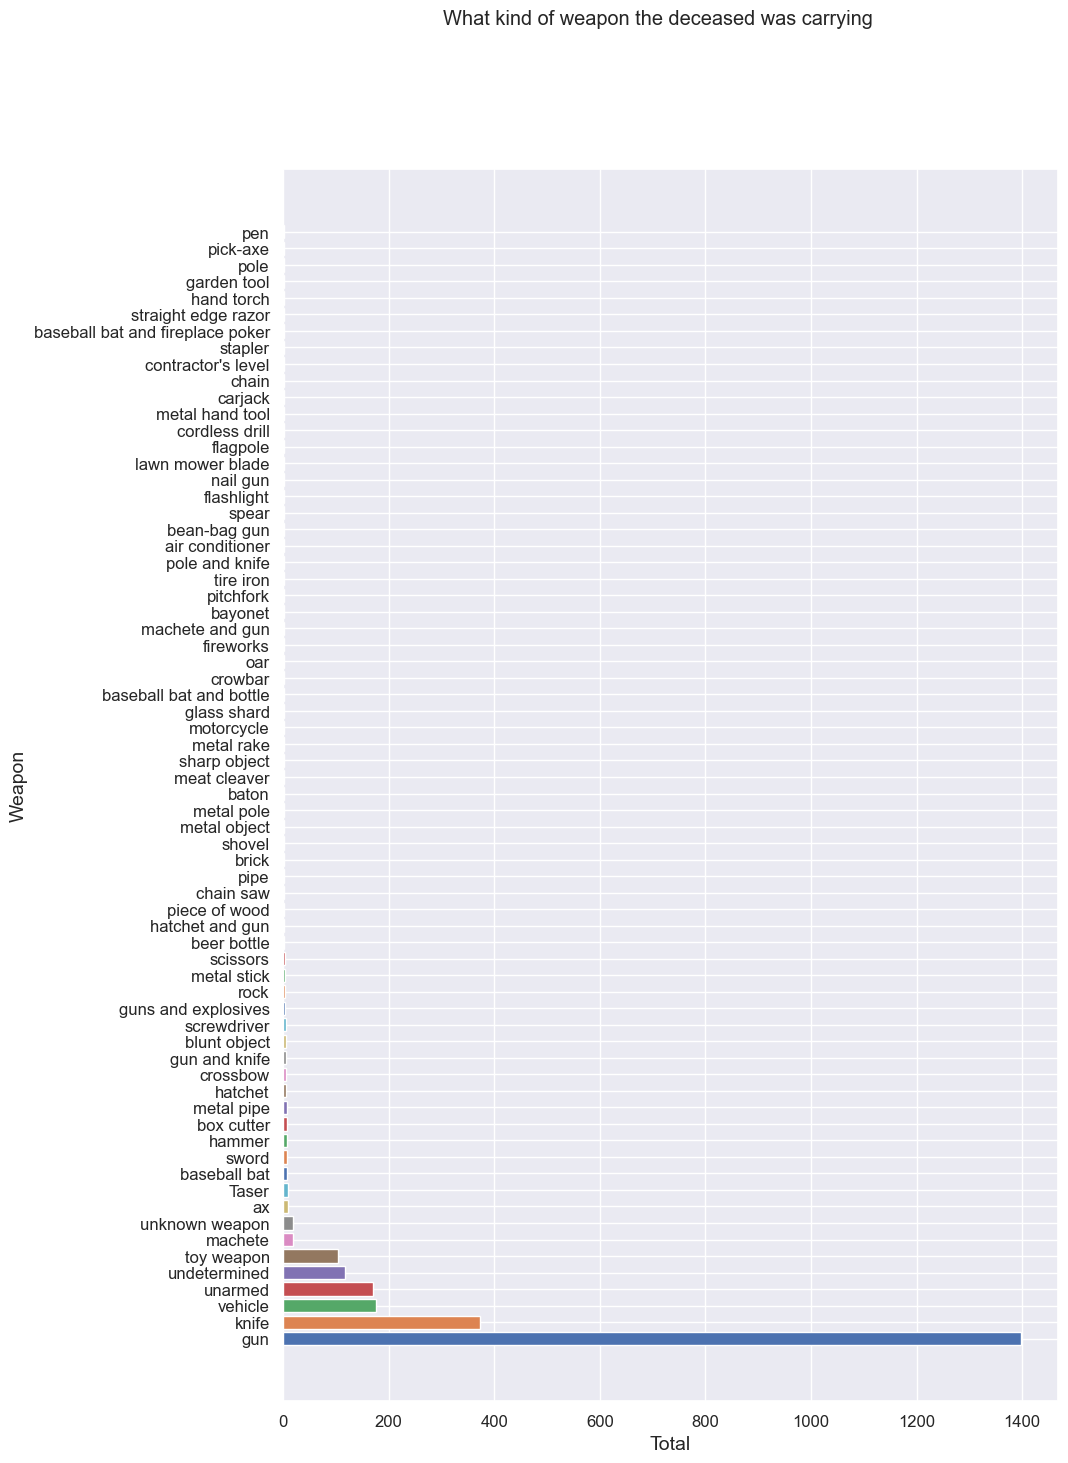

In [97]:
arm = df_fatalities.armed.value_counts()
arm
plt.figure(figsize=(10,16))
plt.suptitle('What kind of weapon the deceased was carrying')
plt.ylabel('Weapon', fontsize=14)
plt.xlabel('Total', fontsize=14)

for n in range(len(arm)):
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.barh(arm.index[n], arm[n])

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [98]:
junior = df_fatalities.loc[df_fatalities['age'] < 25]
under = junior.id.count()

senior = df_fatalities.loc[df_fatalities['age'] > 25]
over = senior.id.count()

print(f"{round((under / over) * 100)}% of people killed were under 25 years old.")

28% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



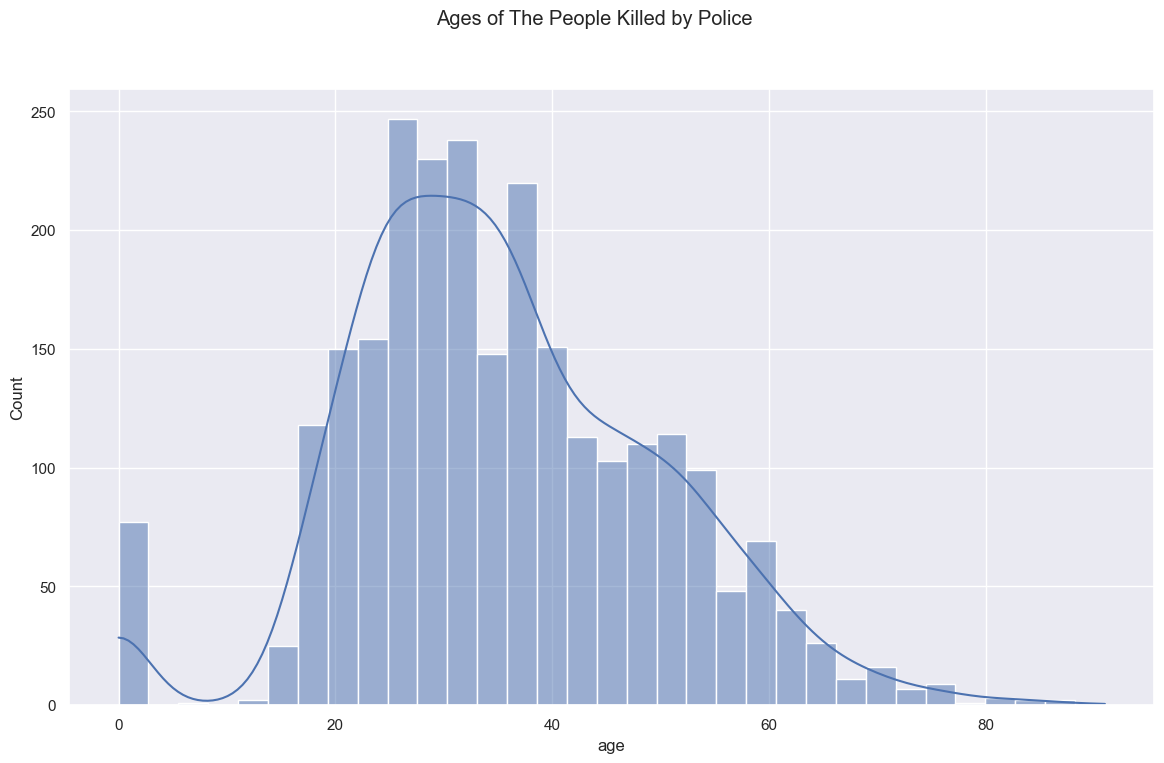

In [99]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silen

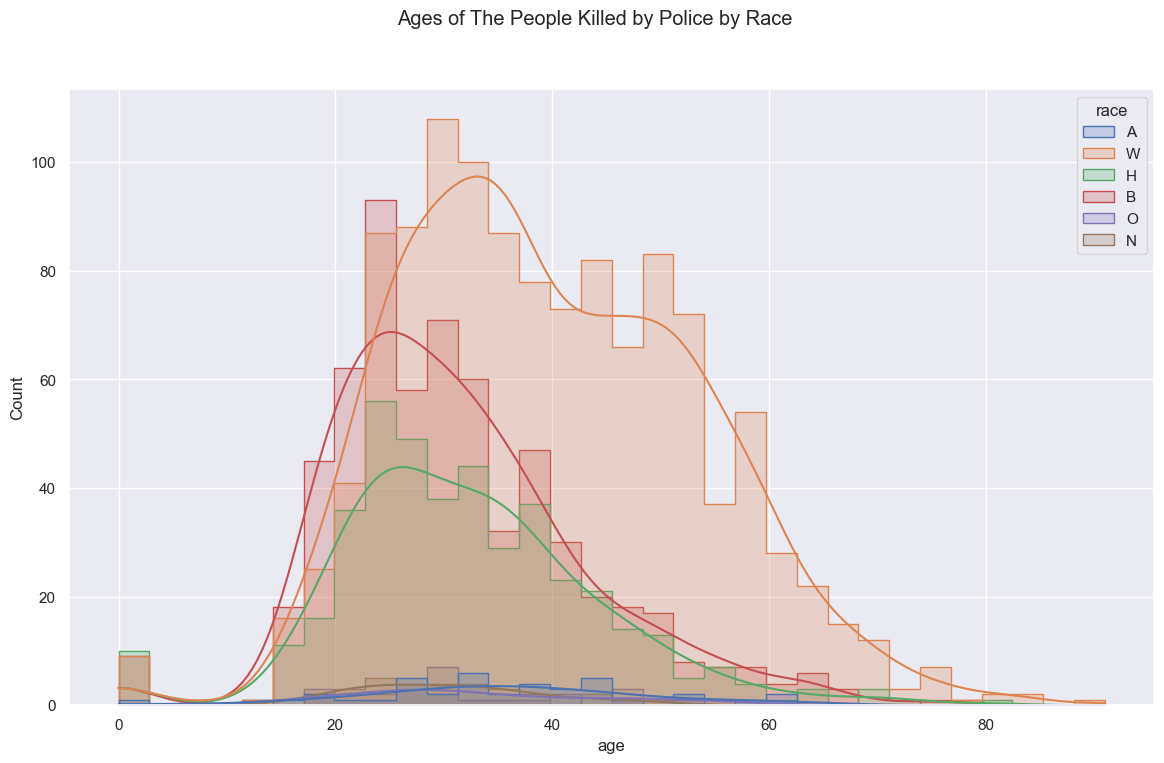

In [100]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='step')
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [101]:
race_kill = df_fatalities.race.value_counts()
race_kill

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

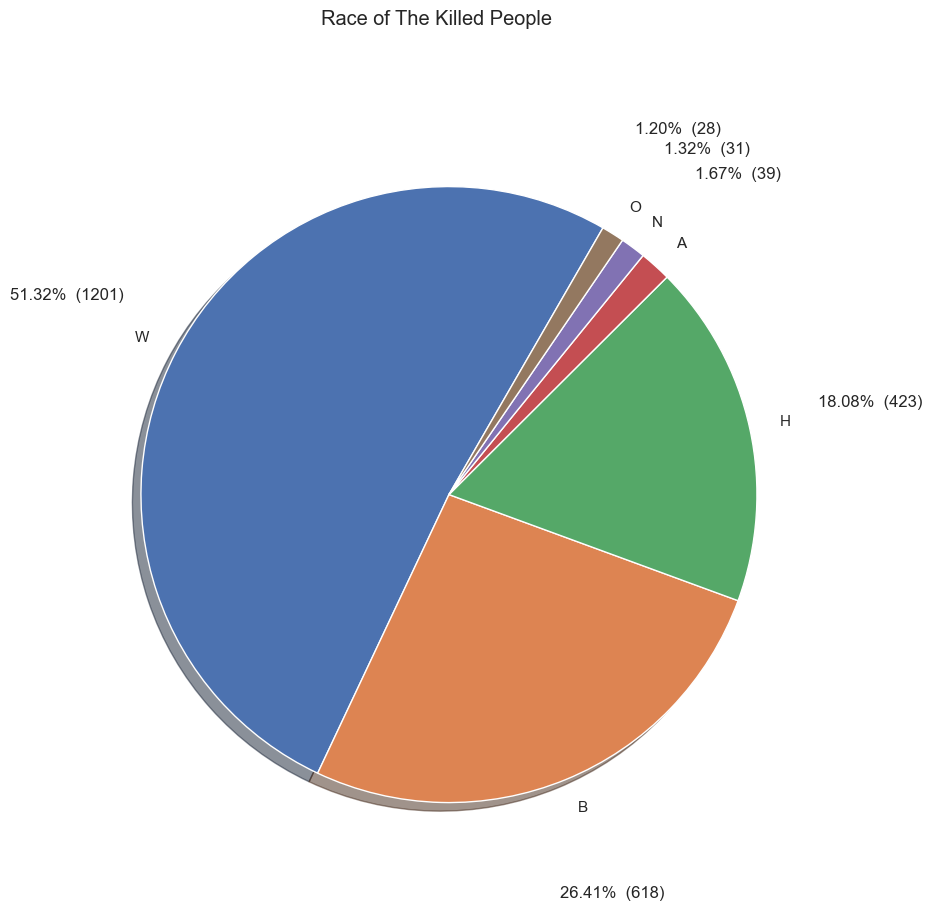

In [102]:
plt.figure(figsize=(10,10))
plt.suptitle('Race of The Killed People')
plt.pie(race_kill, labels=race_kill.index, autopct=make_autopct(race_kill), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [104]:
mental = df_fatalities.signs_of_mental_illness.value_counts()

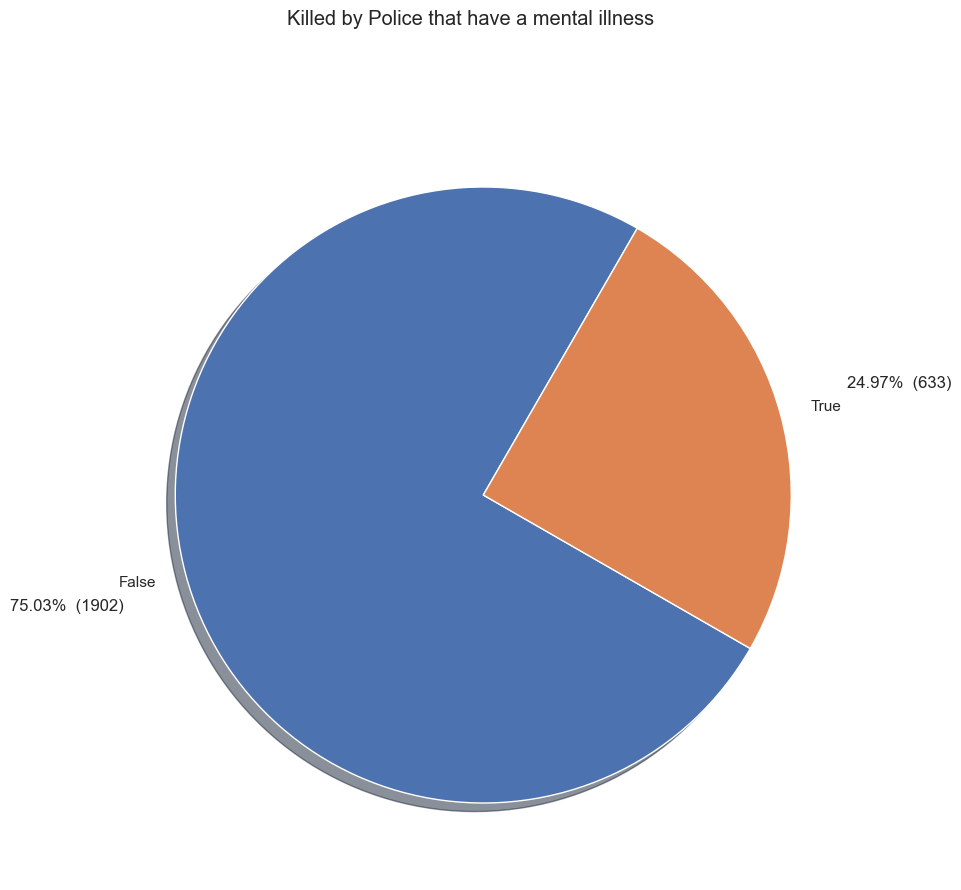

In [105]:
plt.figure(figsize=(10,10))
plt.suptitle('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct=make_autopct(mental), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [106]:
cities = df_fatalities.city.value_counts().head(10)
cities

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

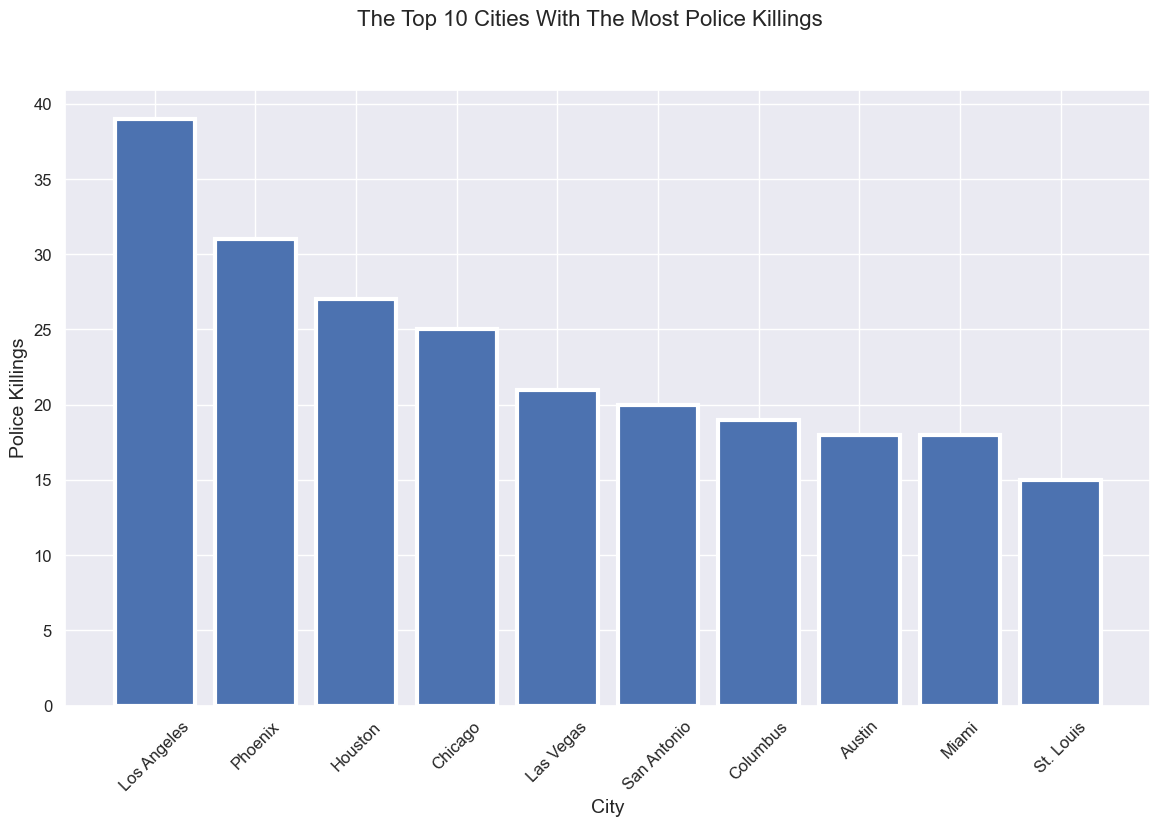

In [107]:
plt.figure(figsize=(14,8))
plt.suptitle('The Top 10 Cities With The Most Police Killings', fontsize=16)
plt.ylabel('Police Killings', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.bar(cities.index, cities, label=cities.index, linewidth=3)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

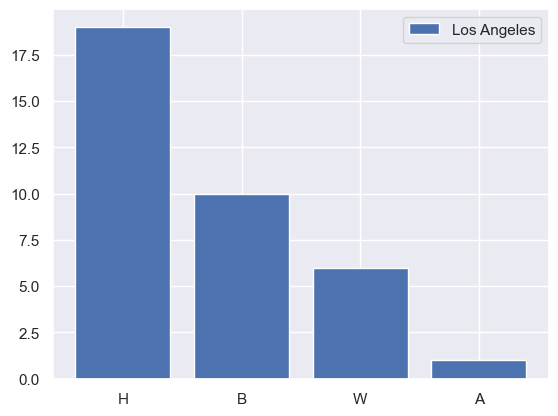

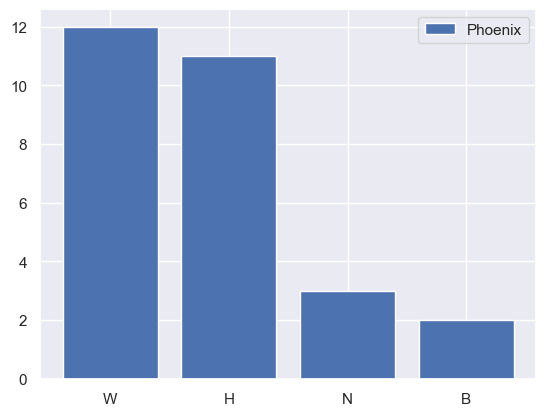

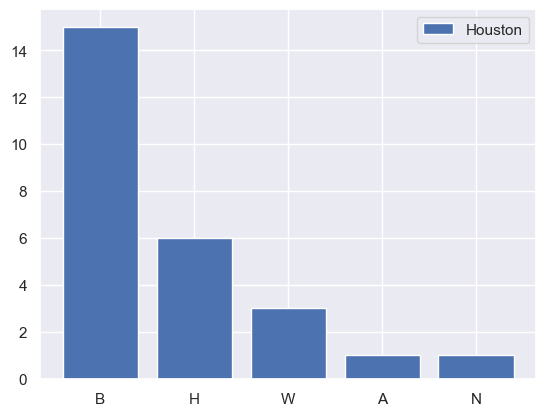

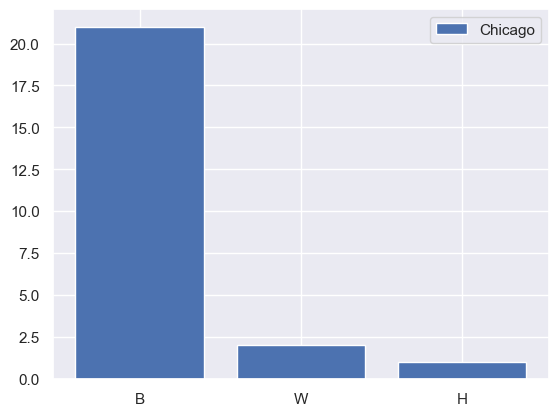

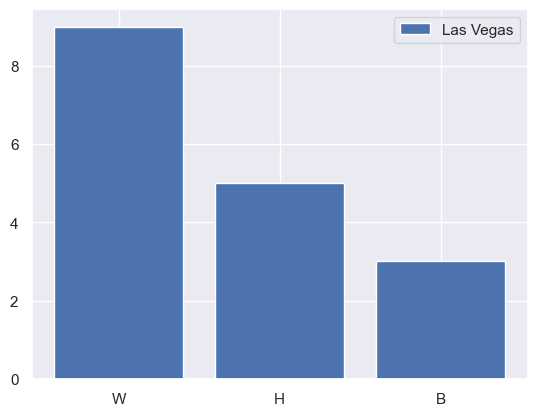

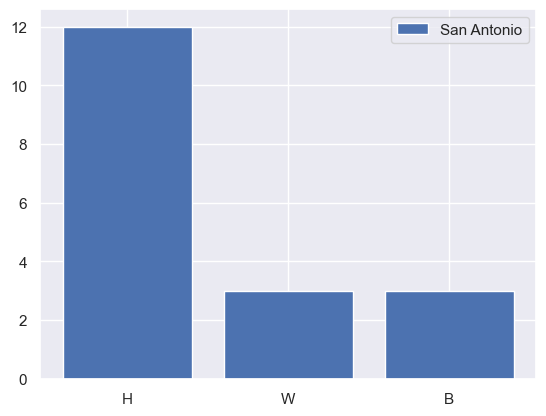

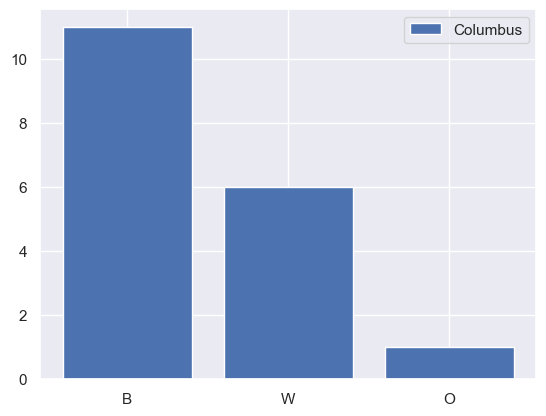

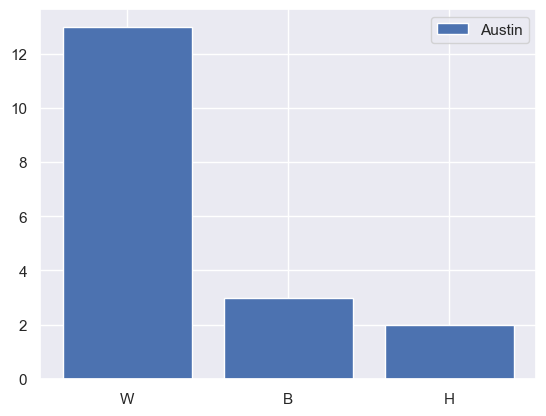

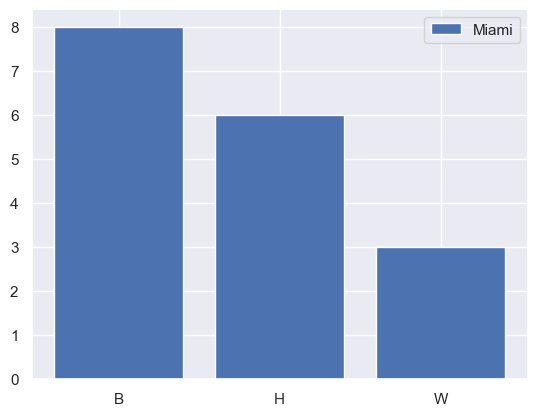

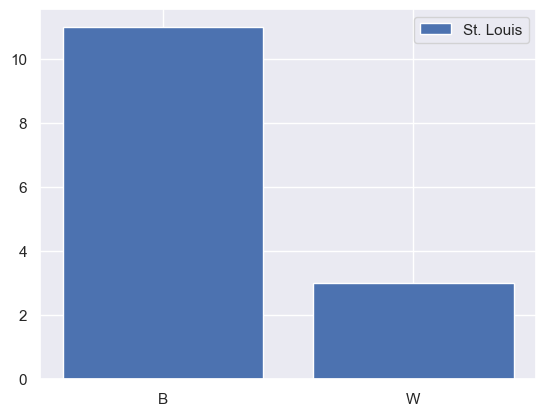

In [110]:
top = df_fatalities[['city', 'race']]
for c in cities.index:
    top_cities = top.loc[top['city'] == c]
    city = top_cities.race.value_counts()
    plt.bar(city.index, city, label=c)
    plt.legend(loc='best')
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [111]:
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_to_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
WI     43
IN     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

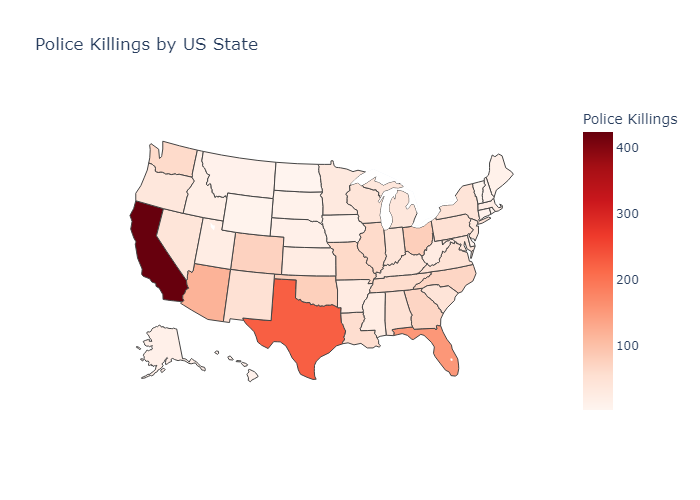

In [112]:
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.index, # Spatial coordinates
    z = states_to_map, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa', # limite map scope to USA
)

fig.show("png")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [113]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date, infer_datetime_format=True).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\56527263.py:2: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\56527263.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11944\56527263.py:2: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'M' instead.



In [114]:
history = monthly_fatalities.groupby('date').size()
history

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

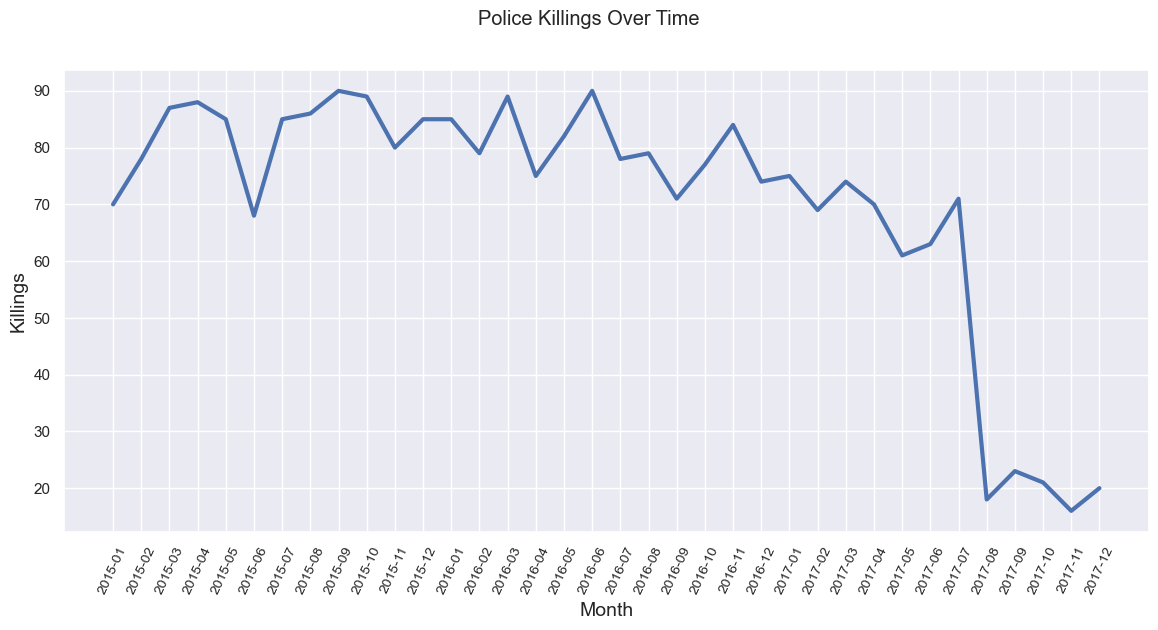

In [115]:
plt.figure(figsize=(14,6))
plt.plot(history.index, history, linewidth=3)
plt.xticks(ticks=history.index, fontsize=10, rotation=65)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).